In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [8]:
dataset = pd.read_csv("/insurance-regression-model/insurance.csv")
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [24]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## Data preprocessing

### Label Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
sex = dataset.iloc[:,1].values
le = LabelEncoder()
sex_encoded = le.fit_transform(sex)
sex_encoded  # female: 0  male: 1
sex_df = pd.DataFrame(data=sex_encoded, columns=['sex'])
sex_df

,sex
0,0
1,1
2,1
3,1
4,1
...,...
1333,1
1334,0
1335,0
1336,0


In [41]:
smoker = dataset.iloc[:, 4].values
smoker_encoded = le.fit_transform(smoker)
smoker_encoded # no: 0  yes: 1
smoker_df = pd.DataFrame(data=smoker_encoded, columns=['smoker'])
smoker_df

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


## ['southwest', 'southeast', 'northwest', 'northeast']

In [39]:
region = dataset.iloc[:, -2].values.reshape(-1,1)
ohe = OneHotEncoder()
region_encoded = ohe.fit_transform(region).toarray()
region_df = pd.DataFrame(data=region_encoded, columns=['southwest', 'southeast', 'northwest', 'northeast'])
region_df

,southwest,southeast,northwest,northeast
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
1333,0.0,1.0,0.0,0.0
1334,1.0,0.0,0.0,0.0
1335,0.0,0.0,1.0,0.0
1336,0.0,0.0,0.0,1.0


In [55]:
age = dataset.iloc[:,0].values
age_df = pd.DataFrame(data=age, columns=['age'])
age_df

,age
0,19
1,18
2,28
3,33
4,32
...,...
1333,50
1334,18
1335,18
1336,21


In [64]:
bmi = dataset.iloc[:,2].values
bmi_df = pd.DataFrame(data=bmi, columns=['bmi'])
bmi_df

,bmi
0,27.900
1,33.770
2,33.000
3,22.705
4,28.880
...,...
1333,30.970
1334,31.920
1335,36.850
1336,25.800


In [65]:
children = dataset.iloc[:,3].values
children_df = pd.DataFrame(data=children, columns=['children'])
children_df

,children
0,0
1,1
2,3
3,0
4,0
...,...
1333,3
1334,0
1335,0
1336,0


In [66]:
charges = dataset.iloc[:, -1].values
charges_df = pd.DataFrame(data=charges, columns=['charges'])
charges_df

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


### Concat dataframe

In [67]:
df = pd.concat([age_df, sex_df, bmi_df, children_df, smoker_df,region_df, charges_df], axis=1)
df

,age,sex,bmi,children,smoker,southwest,southeast,northwest,northeast,charges
0,19,0,27.900,0,1,0.0,0.0,0.0,1.0,16884.92400
1,18,1,33.770,1,0,0.0,0.0,1.0,0.0,1725.55230
2,28,1,33.000,3,0,0.0,0.0,1.0,0.0,4449.46200
3,33,1,22.705,0,0,0.0,1.0,0.0,0.0,21984.47061
4,32,1,28.880,0,0,0.0,1.0,0.0,0.0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0.0,1.0,0.0,0.0,10600.54830
1334,18,0,31.920,0,0,1.0,0.0,0.0,0.0,2205.98080
1335,18,0,36.850,0,0,0.0,0.0,1.0,0.0,1629.83350
1336,21,0,25.800,0,0,0.0,0.0,0.0,1.0,2007.94500


## Data split

In [136]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 9), (268, 9), (1070,), (268,))

## Model Build

In [137]:
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(9, input_shape=[9]),
    tf.keras.layers.Dense(9, activation='linear'),
    tf.keras.layers.Dense(9, activation='linear'),
    tf.keras.layers.Dense(1)
])

## Compile the Model

In [138]:
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                        metrics=['mae'])

In [139]:
history = insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13328.5859 - mae: 13328.5859
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13271.0508 - mae: 13271.0508
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13153.8770 - mae: 13153.8770
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12910.4180 - mae: 12910.4180
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 12438.6006 - mae: 12438.6006
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 11588.8486 - mae: 11588.8486
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 10268.6904 - mae: 10268.6904
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 8705.8799 - mae: 8705.8799
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7636.0942 - mae: 7636.0942
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7440.1484 - 

In [140]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6290.7090 - mae: 6290.7090


[6290.708984375, 6290.708984375]

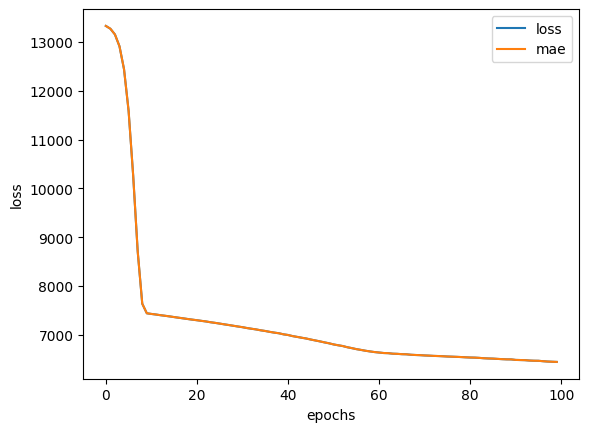

In [141]:
import matplotlib.pyplot as plt

# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
